# détecter les attaques pour tous les types d'attaque  

# import data

## normal:12000  brut force:12000  sql:236  xss:452

In [79]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
bf_logs = pd.read_csv("./data/bf.csv")
normal_logs=pd.read_csv("./data/normal.csv")
sql_logs=pd.read_csv("./data/sql.csv")
xss_logs=pd.read_csv("./data/xss.csv")

In [80]:
bf_logs.label=1
sql_logs.label=2
xss_logs.label=3
xss_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label
0,0,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,1040,183,3
1,1,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,945,35,3
2,2,192.108.116.88,18/Dec/2017,13,0,31,GET,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",200,34463,8,3
3,3,192.108.116.88,18/Dec/2017,13,2,31,POST,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",-,-,-,3
4,4,192.108.116.88,18/Dec/2017,13,4,31,POST,datalab,"';alert(String.fromCharCode(88,83,83))//';aler...",-,-,-,3
5,5,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,1040,19,3
6,6,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,945,24,3
7,7,192.108.116.88,18/Dec/2017,13,4,56,GET,datalab,'';!--<XSS>=&{()},200,34463,2,3
8,8,192.108.116.88,18/Dec/2017,13,4,57,POST,datalab,'';!--<XSS>=&{()},200,1073,206,3
9,9,192.108.116.88,18/Dec/2017,13,4,57,GET,datalab,'';!--<XSS>=&{()},304,-,5,3


In [81]:
frames=[normal_logs,sql_logs,xss_logs]
data_logs=pd.concat(frames)

# ajouter nouveau feature
### ajouter des features longueur, des symboles spécials et des mots spécials pour des logs

In [82]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# obtenir la longueur de lien(information)
def get_len(info_comp):
    return len(info_comp)

# obtenir des symboles spécials pour logs sql
def get_sql_char(info_comp):
    return len(re.findall("[?=\*#@%>]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs sql
def get_sql_word(info_comp):
    return len(re.findall("(SELECT)|(version)|(comment)|(user)|(FROM)|(mysql)|(host)|(DELET)|(name)|(MYSQL)|(WHERE)|(password)|(ORDER)",info_comp,re.IGNORECASE))

# obtenir des symboles spécials pour logs xss
def get_xss_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs xss
def get_xss_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))

def get_password_number(info_comp):
    return len(re.findall("((?:0(?=1)|1(?=2)|2(?=3)|3(?=4)|4(?=5)|5(?=6)|6(?=7)|7(?=8)|8(?=9)|9(?=0)){2}\d)|((\d)\1{2})",info_comp,re.IGNORECASE))

def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]


In [83]:
f=lambda x: str(x)
data_logs['len']=data_logs['password'].apply(f).apply(get_len)
data_logs['sqlchar']=data_logs['password'].apply(f).apply(get_sql_char)
data_logs['sqlword']=data_logs['password'].apply(f).apply(get_sql_word)
data_logs['xsschar']=data_logs['password'].apply(f).apply(get_xss_char)
data_logs['xssword']=data_logs['password'].apply(f).apply(get_xss_word)
data_logs['passnumber']=data_logs['password'].apply(f).apply(get_password_number)
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,76.121.199.123,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0,0
1,1,76.121.199.123,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0,0
2,2,76.121.199.123,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0,0
3,3,76.121.199.123,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0,0
4,4,76.121.199.123,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,2,0,7,0,0,0,0,0
5,5,76.121.199.123,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,6,0,7,0,0,0,0,0
6,6,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0,0
7,7,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0,0
8,8,114.67.130.218,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0,0
9,9,114.67.130.218,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0,0


In [84]:
bf_logs['len']=bf_logs['password'].apply(f).apply(get_len)
bf_logs['sqlchar']=bf_logs['password'].apply(f).apply(get_sql_char)
bf_logs['sqlword']=bf_logs['password'].apply(f).apply(get_sql_word)
bf_logs['xsschar']=bf_logs['password'].apply(f).apply(get_xss_char)
bf_logs['xssword']=bf_logs['password'].apply(f).apply(get_xss_word)
bf_logs['passnumber']=bf_logs['password'].apply(f).apply(get_password_number)
bf_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0,2
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0,2
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0,2
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0,2
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0,2
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0,2
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0,2
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0,2
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0,2
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0,2


# transformer la forme de l'adresse ip

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_logs['ip_address'] = le.fit_transform(data_logs['ip_address'].apply(f)) 
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,1796,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0,0
1,1,1796,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0,0
2,2,1796,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0,0
3,3,1796,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0,0
4,4,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,2,0,7,0,0,0,0,0
5,5,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,-,6,0,7,0,0,0,0,0
6,6,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0,0
7,7,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0,0
8,8,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0,0
9,9,144,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0,0


In [86]:
bf_logs['ip_address'] = le.fit_transform(bf_logs['ip_address'].apply(f)) 
bf_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,3,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0,2
1,1,3,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0,2
2,2,3,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0,2
3,3,11,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0,2
4,4,11,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0,2
5,5,11,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0,2
6,6,3,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0,2
7,7,3,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0,2
8,8,3,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0,2
9,9,11,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0,2


In [87]:
del data_logs[data_logs.columns[0]]

In [88]:
del bf_logs[bf_logs.columns[0]]

# arrange feature
### remplacer des données null au 0

In [89]:
def replace(resp):
    if resp == '-':
        resp=0
    elif (resp==resp)==False:
        resp=0
    return (resp)
data_logs['respsize']=data_logs['respsize'].apply(replace)
data_logs['timed']=data_logs['timed'].apply(replace)
data_logs['status']=data_logs['status'].apply(replace)

In [90]:
bf_logs['respsize']=bf_logs['respsize'].apply(replace)
bf_logs['timed']=bf_logs['timed'].apply(replace)
bf_logs['status']=bf_logs['status'].apply(replace)

# la visualisation de la performance

In [91]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
def plot_roc(model,y_test,y_pred):
    # Compute ROC curve and ROC area for each class  
    fpr,tpr,threshold = roc_curve(y_test, y_pred) ###True positive和false positive  
    roc_auc = auc(fpr,tpr) ###auc 

    plt.figure()  
    lw = 2  
    plt.figure(figsize=(5,5))  
    plt.plot(fpr, tpr, color='darkorange',  
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.title('Receiver operating characteristic example')  
    plt.legend(loc="lower right")  
    plt.show()  

# utiliser des features sans l'adresse ip

In [93]:
data_logs.reset_index(drop=True, inplace=True)
data_logs

,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,1796,21/Jan/2018,23,59,0,GET,12345678,michael,200,1040,20,0,7,0,0,0,0,0
1,1796,21/Jan/2018,23,59,1,GET,12345678,michael,200,945,22,0,7,0,0,0,0,0
2,1796,21/Jan/2018,23,59,4,GET,12345678,michael,200,34463,2435,0,7,0,0,0,0,0
3,1796,21/Jan/2018,23,59,6,POST,12345678,michael,200,1073,1852,0,7,0,0,0,0,0
4,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,0,2,0,7,0,0,0,0,0
5,1796,21/Jan/2018,23,59,7,GET,12345678,michael,304,0,6,0,7,0,0,0,0,0
6,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,1040,1,0,7,0,0,0,0,0
7,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,945,1,0,7,0,0,0,0,0
8,144,21/Jan/2018,23,59,12,GET,personal,klaster,200,34463,3,0,7,0,0,0,0,0
9,144,21/Jan/2018,23,59,13,POST,personal,klaster,200,1073,134,0,7,0,0,0,0,0


In [94]:
features = list(data_logs.columns[[0,2,3,4,8,9,10,12,13,14,15,16,17]])
X_1 = data_logs[features]
X_1

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,1796,23,59,0,200,1040,20,7,0,0,0,0,0
1,1796,23,59,1,200,945,22,7,0,0,0,0,0
2,1796,23,59,4,200,34463,2435,7,0,0,0,0,0
3,1796,23,59,6,200,1073,1852,7,0,0,0,0,0
4,1796,23,59,7,304,0,2,7,0,0,0,0,0
5,1796,23,59,7,304,0,6,7,0,0,0,0,0
6,144,23,59,12,200,1040,1,7,0,0,0,0,0
7,144,23,59,12,200,945,1,7,0,0,0,0,0
8,144,23,59,12,200,34463,3,7,0,0,0,0,0
9,144,23,59,13,200,1073,134,7,0,0,0,0,0


In [95]:
features = list(bf_logs.columns[[0,2,3,4,8,9,10,12,13,14,15,16,17]])
X_2 = bf_logs[features]
X_2

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,3,15,2,1,200,1040,312,6,0,0,0,0,2
1,3,15,2,1,200,945,14,6,0,0,0,0,2
2,3,15,2,2,200,34463,9,6,0,0,0,0,2
3,11,15,2,3,200,1040,2,6,0,0,0,0,2
4,11,15,2,4,200,945,9,6,0,0,0,0,2
5,11,15,2,4,200,34463,7,6,0,0,0,0,2
6,3,15,2,6,200,1073,2547,6,0,0,0,0,2
7,3,15,2,6,304,0,2,6,0,0,0,0,2
8,3,15,2,7,304,0,9,6,0,0,0,0,2
9,11,15,2,7,200,1073,1583,6,0,0,0,0,2


In [96]:
def transint(x):
    x=int(x)
    return(x)
X_1['status']=X_1['status'].apply(transint)
X_1['respsize']=X_1['respsize'].apply(transint)
X_1['timed']=X_1['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [97]:
X_2['status']=X_2['status'].apply(transint)
X_2['respsize']=X_2['respsize'].apply(transint)
X_2['timed']=X_2['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

# tirer des labels "1" pour logs d'attaque, "0" pour logs de non attaque

In [98]:
y_1=data_logs['label']
y_1=y_1.apply(transint)
y_1

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12658    3
12659    3
12660    3
12661    3
12662    3
12663    3
12664    3
12665    3
12666    3
12667    3
12668    3
12669    3
12670    3
12671    3
12672    3
12673    3
12674    3
12675    3
12676    3
12677    3
12678    3
12679    3
12680    3
12681    3
12682    3
12683    3
12684    3
12685    3
12686    3
12687    3
Name: label, dtype: int64

In [99]:
y_2=bf_logs['label']
y_2=y_2.apply(transint)
y_2

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
128029    1
128030    1
128031    1
128032    1
128033    1
128034    1
128035    1
128036    1
128037    1
128038    1
128039    1
128040    1
128041    1
128042    1
128043    1
128044    1
128045    1
128046    1
128047    1
128048    1
128049    1
128050    1
128051    1
128052    1
128053    1
128054    1
128055    1
128056    1
128057    1
128058    1
Name: label, dtype: int64

# separer des données aux train set(70%) et test set(30%) 
#### pour attaque par brute force train set(92%) et test set(8%)

In [100]:
from sklearn import cross_validation
X_train1, X_test1, y_train1, y_test1 = cross_validation.train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [101]:
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(X_2, y_2, test_size=0.92, random_state=0)

In [102]:
X_train=pd.concat([X_train1,X_train2])
X_test=pd.concat([X_test1,X_test2])
y_train=pd.concat([y_train1,y_train2])
y_test=pd.concat([y_test1,y_test2])

In [103]:
def tanslateto1(x):
    if x==2 or x==3:
        x=1
    return(x)

In [104]:
y_train=y_train.apply(tanslateto1)
y_test=y_test.apply(tanslateto1)

In [105]:
list_ip_train=np.array(X_train['ip_address']).tolist()
def count_ip_train(x):
    ipcount=list_ip_train.count(x)
    return(ipcount)
X_train['ipcount']=X_train['ip_address'].apply(count_ip_train)

In [106]:
list_ip_test=np.array(X_test['ip_address']).tolist()
def count_ip_test(x):
    ipcount=list_ip_test.count(x)
    return(ipcount)
X_test['ipcount']=X_test['ip_address'].apply(count_ip_test)

In [107]:
X_test

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber,ipcount
9056,982,3,12,41,200,34463,0,6,0,0,0,0,0,3
8827,1710,3,7,50,200,945,1,6,0,0,0,0,0,2
9271,1856,3,17,14,200,945,0,6,0,0,0,0,0,2
10012,154,3,32,48,304,0,0,6,0,0,0,0,0,3
7933,675,2,49,29,200,945,2,6,0,0,0,0,0,2
8118,1444,2,53,15,200,1040,1,7,0,0,0,0,0,3
6909,31,2,27,42,200,1073,495,6,0,0,0,0,0,3
6132,970,2,8,20,200,1040,1,6,0,0,0,0,0,3
5585,1169,1,56,45,304,0,1,7,0,0,0,0,0,3
7081,1875,2,31,16,200,945,1,6,0,0,0,0,0,5


In [108]:
X_train

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber,ipcount
1398,443,0,28,43,200,1040,1,4,0,0,0,0,0,3
1203,1050,0,24,43,200,1073,1046,6,0,0,0,0,0,4
7852,1225,2,47,42,304,0,1,6,0,0,0,0,0,3
6807,204,2,24,3,200,1073,4469,6,0,0,0,0,1,5
6635,1102,2,18,50,304,0,1,6,0,0,0,0,0,6
4981,68,1,44,20,200,945,1,9,0,0,0,0,3,6
6966,35,2,28,52,200,1040,0,6,0,0,0,0,0,5
6290,1373,2,11,36,200,34463,0,6,0,0,0,0,0,3
2533,877,0,53,26,200,945,1,6,0,0,0,0,0,4
4581,761,1,36,19,200,1073,392,6,0,0,0,0,0,3


In [110]:
del X_test['ip_address']
del X_train['ip_address']

In [137]:
del X_test['hour']
del X_train['hour']
del X_test['minute']
del X_train['minute']
del X_test['seconds']
del X_train['seconds']

# Choisir des features

In [206]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf_f = ExtraTreesClassifier()
clf_f = clf_f.fit(X_train, y_train)
clf_f.feature_importances_

array([  2.37647288e-03,   8.05180114e-04,   3.55701521e-03,
         2.98244787e-03,   3.03205662e-03,   7.72793398e-04,
         1.60448763e-03,   4.90010932e-03,   2.38335517e-03,
         9.77586082e-01])

In [207]:
model = SelectFromModel(clf_f,threshold=0.002,prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [208]:
X_train_new

array([[ 200,    1,    4, ...,    0,    0,    3],
       [ 200, 1046,    6, ...,    0,    0,    4],
       [ 304,    1,    6, ...,    0,    0,    3],
       ..., 
       [ 200,    1,    6, ...,    0,    0,  587],
       [ 304,    3,    8, ...,    0,    0,  587],
       [ 304,    2,    5, ...,    0,    1,  611]], dtype=int64)

In [209]:
X_train_new[0]

array([200,   1,   4,   0,   0,   0,   3], dtype=int64)

In [210]:
X_test_new

array([[ 200,    0,    6, ...,    0,    0,    3],
       [ 200,    1,    6, ...,    0,    0,    2],
       [ 200,    0,    6, ...,    0,    0,    2],
       ..., 
       [ 200,    0,    7, ...,    0,    0, 6741],
       [ 200,    0,    7, ...,    0,    0, 5807],
       [ 304,   10,    4, ...,    0,    0, 6112]], dtype=int64)

# algorithme l'arbre de décision 

metrics.confusion_matrix:
[[  3585     28]
 [   270 117739]]
metrics.accuracy_score:
0.997549785401
metrics.precision_score:
0.999762242394
metrics.recall_score:
0.997712038912
metrics.f1_score:
0.998736088491
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.23% (270/118009)
attaque/attaque: 99.77% (117739/118009)


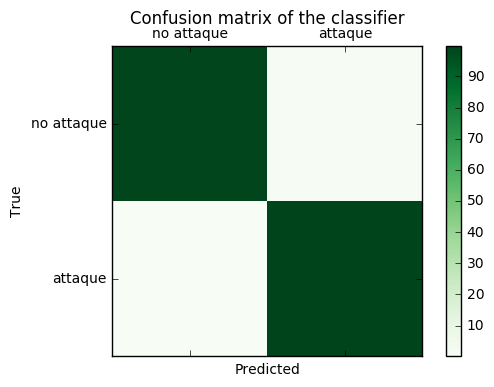

In [211]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# training
clf = clf.fit(X_train_new, y_train)
# classification
y_pred = clf.predict(X_test_new)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
# performance

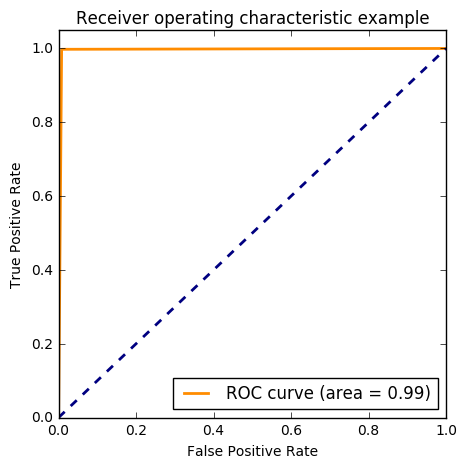

In [212]:
plot_roc(clf,y_test,y_pred)

# la visualisation de l'arbre de décision 

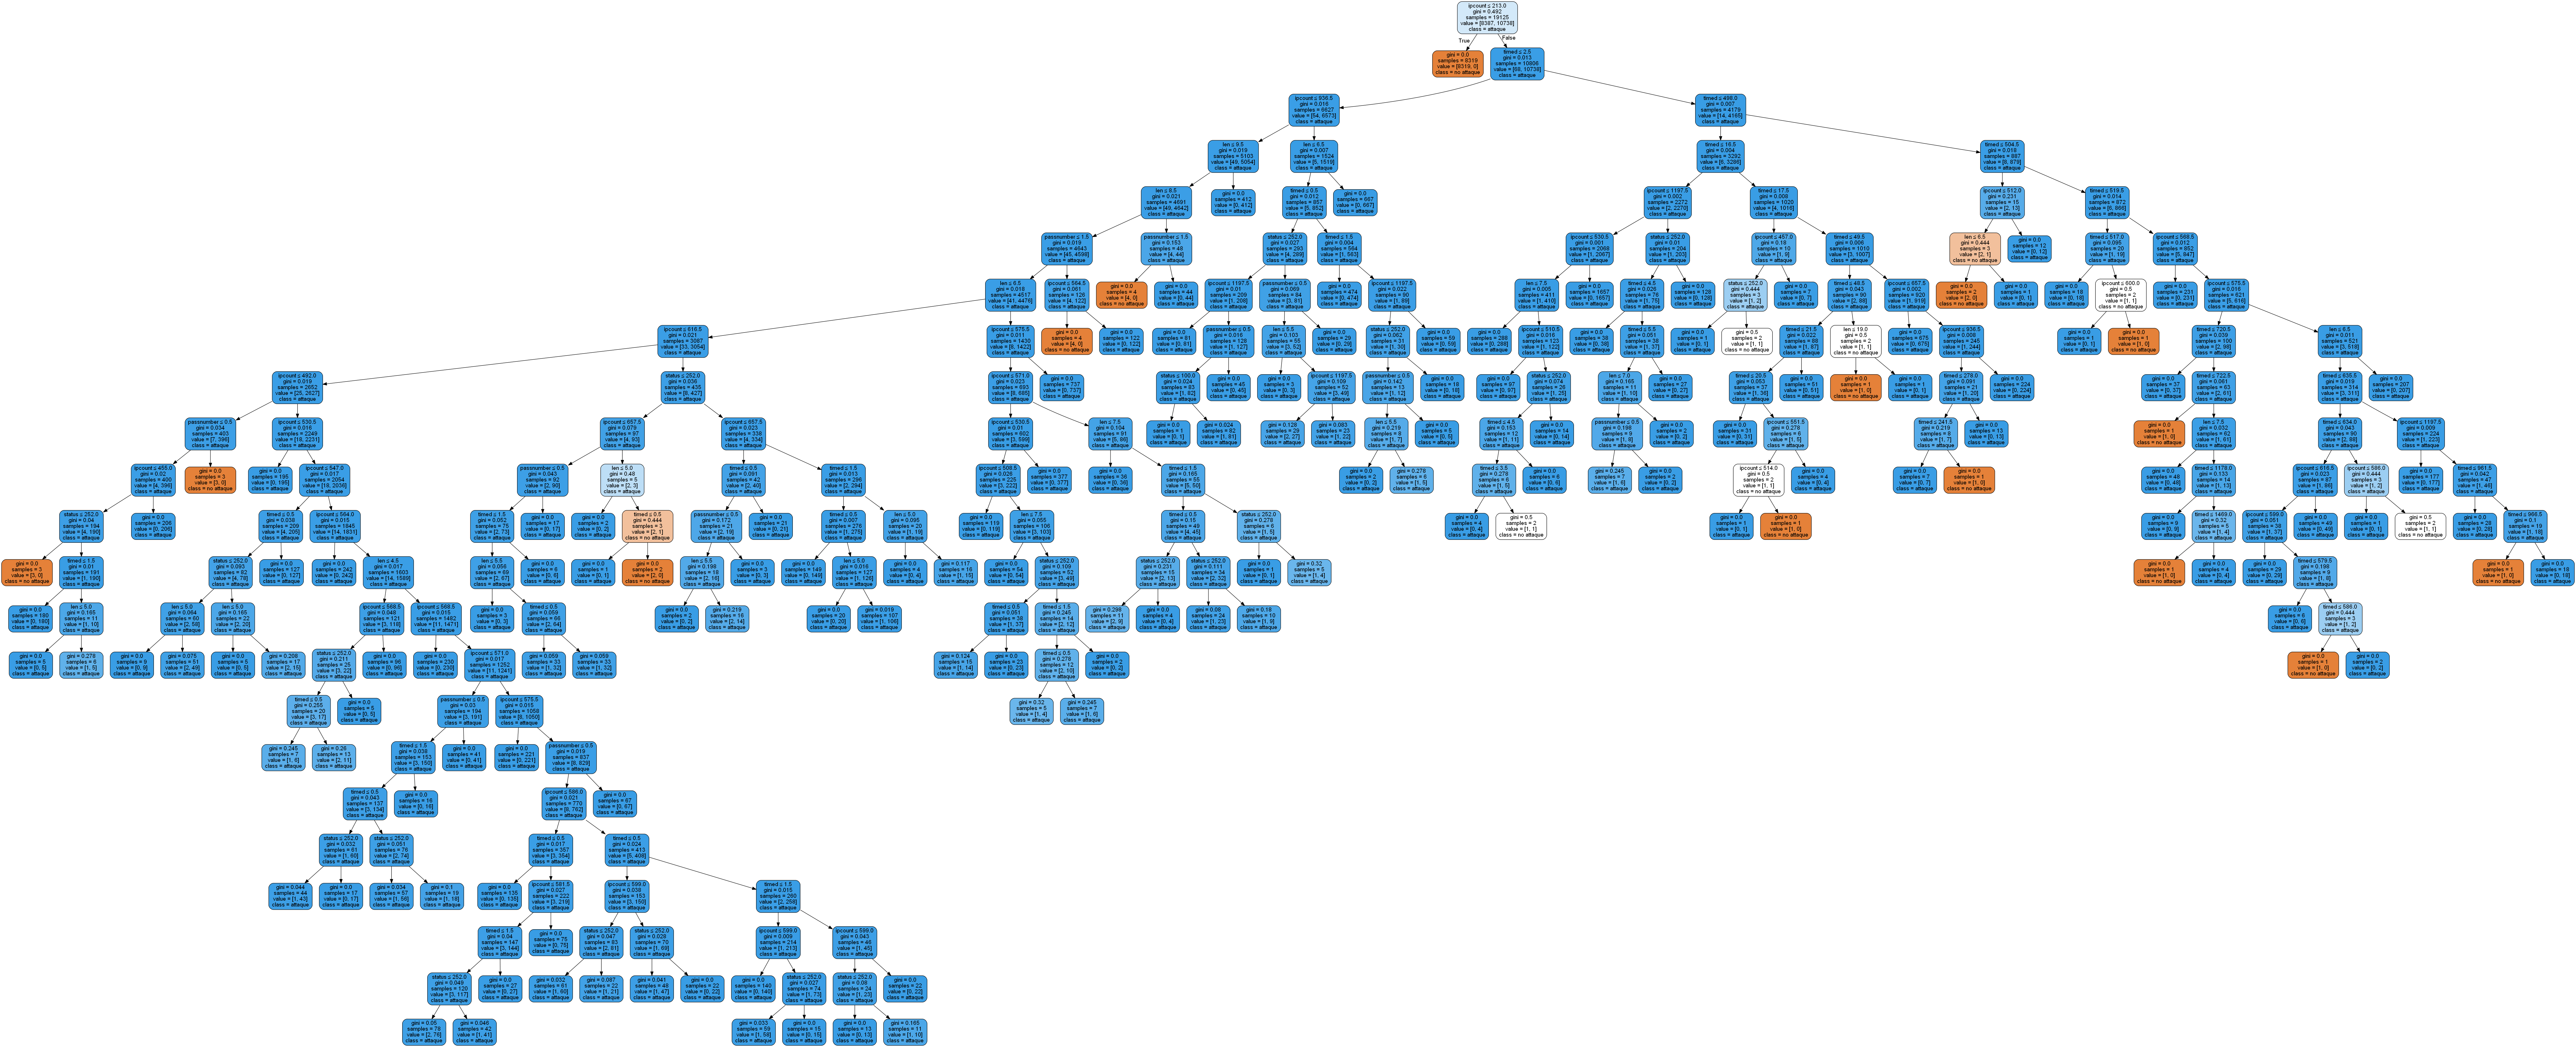

In [276]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train[[0,2,3,4,7,8,9]].columns,  
                         class_names=['no attaque', 'attaque'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [277]:
graph.write_pdf("tree.pdf")

True

# algorithme logistique régression 

metrics.confusion_matrix:
[[  3585     28]
 [   175 117834]]
metrics.accuracy_score:
0.998330894082
metrics.precision_score:
0.999762434033
metrics.recall_score:
0.998517062258
metrics.f1_score:
0.999139360074
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.15% (175/118009)
attaque/attaque: 99.85% (117834/118009)


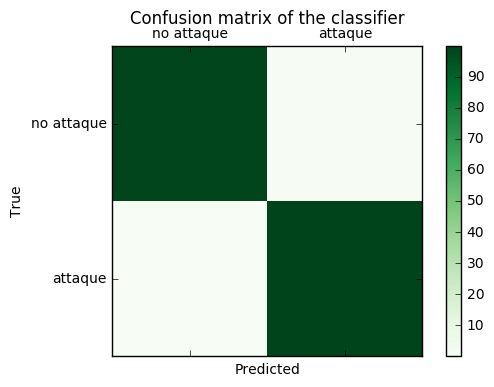

In [213]:
from sklearn.linear_model import LogisticRegression
# classifier
clf_log = LogisticRegression()
# training
clf_log = clf_log.fit(X_train_new, y_train)
# classification
y_pred = clf_log.predict(X_test_new)
# confusion matrix
labels = ['no attaque', 'attaque']
do_metrics(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme de random forest

metrics.confusion_matrix:
[[  3585     28]
 [    33 117976]]
metrics.accuracy_score:
0.999498446005
metrics.precision_score:
0.999762719908
metrics.recall_score:
0.999720360312
metrics.f1_score:
0.999741539661
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.03% (33/118009)
attaque/attaque: 99.97% (117976/118009)


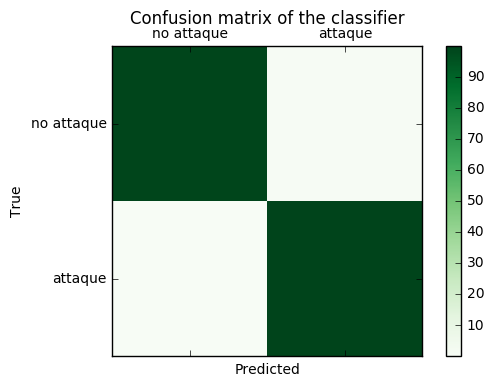

In [242]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train_new, y_train)
# classification
y_pred = clf_rf.predict(X_test_new)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

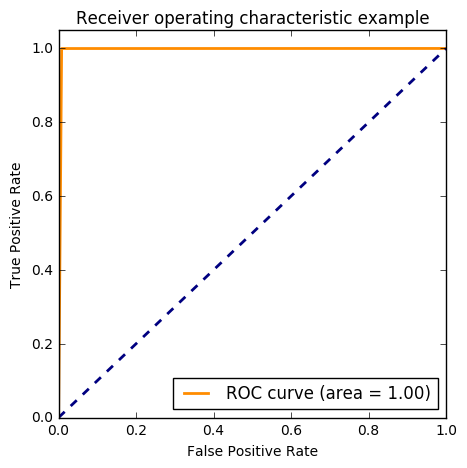

In [274]:
plot_roc(clf_rf,y_test,y_pred)

# algorithme Adaboost

metrics.confusion_matrix:
[[  3586     27]
 [   194 117815]]
metrics.accuracy_score:
0.998182894542
metrics.precision_score:
0.999770879652
metrics.recall_score:
0.998356057589
metrics.f1_score:
0.999062967721
Confusion Matrix Stats
no attaque/no attaque: 99.25% (3586/3613)
no attaque/attaque: 0.75% (27/3613)
attaque/no attaque: 0.16% (194/118009)
attaque/attaque: 99.84% (117815/118009)


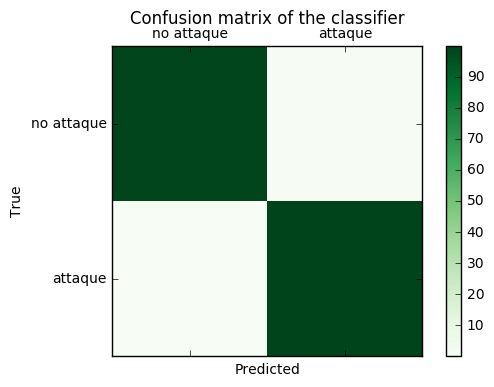

In [224]:
from sklearn.ensemble import AdaBoostClassifier
# classifier
clf_ada = AdaBoostClassifier(n_estimators=100)
# training
clf_ada = clf_ada.fit(X_train_new, y_train)
# classification
y_pred = clf_ada.predict(X_test_new)
# performance
do_metrics(y_test,y_pred)
# confusion matrix
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme XGBoost

metrics.confusion_matrix:
[[  3585     28]
 [   194 117815]]
metrics.accuracy_score:
0.998174672345
metrics.precision_score:
0.99976239573
metrics.recall_score:
0.998356057589
metrics.f1_score:
0.999058731747
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.16% (194/118009)
attaque/attaque: 99.84% (117815/118009)


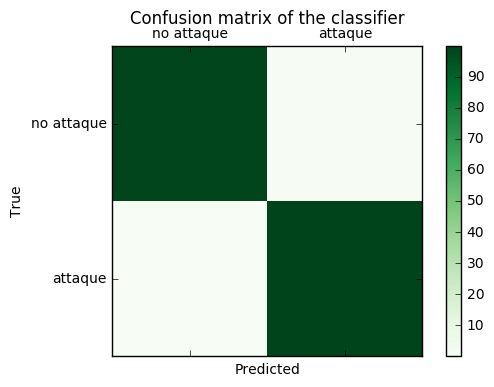

In [223]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(max_depth=6, learning_rate=0.03, n_estimators=200, silent=True, objective='binary:logistic')
model.fit(X_train_new, y_train)
ans = model.predict(X_test_new)
do_metrics(y_test, ans)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, ans)
plot_cm(cm, labels)

## régler les paramètres pour RandomForest

### n_estimators range(10,201,20)

In [247]:
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':list(range(10,201,20))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train_new, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.99724, std: 0.00093, params: {'n_estimators': 10},
  mean: 0.99711, std: 0.00091, params: {'n_estimators': 30},
  mean: 0.99708, std: 0.00092, params: {'n_estimators': 50},
  mean: 0.99728, std: 0.00091, params: {'n_estimators': 70},
  mean: 0.99717, std: 0.00104, params: {'n_estimators': 90},
  mean: 0.99721, std: 0.00097, params: {'n_estimators': 110},
  mean: 0.99713, std: 0.00101, params: {'n_estimators': 130},
  mean: 0.99719, std: 0.00102, params: {'n_estimators': 150},
  mean: 0.99729, std: 0.00095, params: {'n_estimators': 170},
  mean: 0.99721, std: 0.00100, params: {'n_estimators': 190}],
 {'n_estimators': 170},
 0.9972850139212794)

### 'max_depth'  'min_samples_split'

In [248]:
param_test2 = {'max_depth':list(range(3,20,2)), 'min_samples_split':list(range(2,100,10))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train_new, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.99681, std: 0.00115, params: {'min_samples_split': 2, 'max_depth': 3},
  mean: 0.99687, std: 0.00112, params: {'min_samples_split': 12, 'max_depth': 3},
  mean: 0.99721, std: 0.00100, params: {'min_samples_split': 22, 'max_depth': 3},
  mean: 0.99691, std: 0.00094, params: {'min_samples_split': 32, 'max_depth': 3},
  mean: 0.99682, std: 0.00109, params: {'min_samples_split': 42, 'max_depth': 3},
  mean: 0.99686, std: 0.00128, params: {'min_samples_split': 52, 'max_depth': 3},
  mean: 0.99677, std: 0.00139, params: {'min_samples_split': 62, 'max_depth': 3},
  mean: 0.99692, std: 0.00118, params: {'min_samples_split': 72, 'max_depth': 3},
  mean: 0.99663, std: 0.00109, params: {'min_samples_split': 82, 'max_depth': 3},
  mean: 0.99690, std: 0.00119, params: {'min_samples_split': 92, 'max_depth': 3},
  mean: 0.99730, std: 0.00081, params: {'min_samples_split': 2, 'max_depth': 5},
  mean: 0.99724, std: 0.00081, params: {'min_samples_split': 12, 'max_depth': 5},
  mean: 0.99700, s

In [249]:
param_test3 = {'min_samples_split':list(range(2,100,20)), 'min_samples_leaf':list(range(1,60,10))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=15),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train_new, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.99781, std: 0.00072, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.99717, std: 0.00077, params: {'min_samples_leaf': 1, 'min_samples_split': 22},
  mean: 0.99751, std: 0.00093, params: {'min_samples_leaf': 1, 'min_samples_split': 42},
  mean: 0.99731, std: 0.00103, params: {'min_samples_leaf': 1, 'min_samples_split': 62},
  mean: 0.99705, std: 0.00111, params: {'min_samples_leaf': 1, 'min_samples_split': 82},
  mean: 0.99716, std: 0.00108, params: {'min_samples_leaf': 11, 'min_samples_split': 2},
  mean: 0.99723, std: 0.00112, params: {'min_samples_leaf': 11, 'min_samples_split': 22},
  mean: 0.99720, std: 0.00121, params: {'min_samples_leaf': 11, 'min_samples_split': 42},
  mean: 0.99662, std: 0.00122, params: {'min_samples_leaf': 11, 'min_samples_split': 62},
  mean: 0.99686, std: 0.00129, params: {'min_samples_leaf': 11, 'min_samples_split': 82},
  mean: 0.99734, std: 0.00104, params: {'min_samples_leaf': 21, 'min_samples_split': 2},
  mean: 0.99727, s

In [273]:
param_test4 = {'max_features':list(range(3,8,1))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, max_depth=11, min_samples_split=2,
                                  min_samples_leaf=1),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train_new, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.99763, std: 0.00086, params: {'max_features': 3},
  mean: 0.99797, std: 0.00045, params: {'max_features': 4},
  mean: 0.99782, std: 0.00063, params: {'max_features': 5},
  mean: 0.99786, std: 0.00031, params: {'max_features': 6},
  mean: 0.99807, std: 0.00039, params: {'max_features': 7}],
 {'max_features': 7},
 0.9980747744348392)

metrics.confusion_matrix:
[[  3585     28]
 [    23 117986]]
metrics.accuracy_score:
0.999580667971
metrics.precision_score:
0.999762740014
metrics.recall_score:
0.999805099611
metrics.f1_score:
0.999783919364
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/attaque: 0.77% (28/3613)
attaque/no attaque: 0.02% (23/118009)
attaque/attaque: 99.98% (117986/118009)


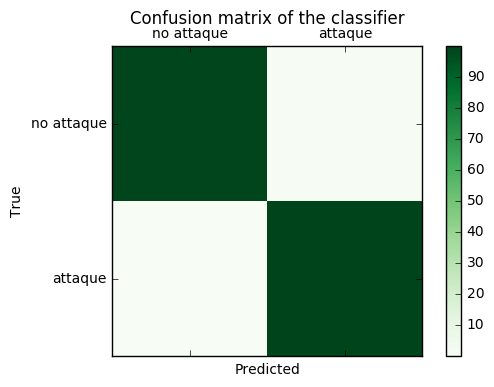

In [270]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier(n_estimators= 170, max_depth=11, min_samples_split=2,
                                  min_samples_leaf=1)
# training
clf_rf = clf_rf.fit(X_train_new, y_train)
# classification
y_pred = clf_rf.predict(X_test_new)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

## multiclassification avec logs normaux et 3 types d'attaque

In [37]:
X_train4=pd.concat([X_train1,X_train2])
X_test4=pd.concat([X_test1,X_test2])
y_train4=pd.concat([y_train1,y_train2])
y_test4=pd.concat([y_test1,y_test2])

In [38]:
def plot_cm4(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [44]:
def do_metrics4(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))

metrics.confusion_matrix:
[[  3585     28      0      0]
 [     9 117806      0      0]
 [     1      0     81      0]
 [     0      0      0    112]]
metrics.accuracy_score:
0.999687556528
Confusion Matrix Stats
no attaque/no attaque: 99.23% (3585/3613)
no attaque/brute force: 0.77% (28/3613)
no attaque/sql: 0.00% (0/3613)
no attaque/xss: 0.00% (0/3613)
brute force/no attaque: 0.01% (9/117815)
brute force/brute force: 99.99% (117806/117815)
brute force/sql: 0.00% (0/117815)
brute force/xss: 0.00% (0/117815)
sql/no attaque: 1.22% (1/82)
sql/brute force: 0.00% (0/82)
sql/sql: 98.78% (81/82)
sql/xss: 0.00% (0/82)
xss/no attaque: 0.00% (0/112)
xss/brute force: 0.00% (0/112)
xss/sql: 0.00% (0/112)
xss/xss: 100.00% (112/112)


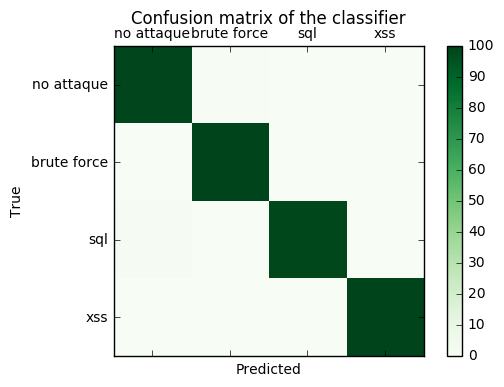

In [48]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf4 = RandomForestClassifier(n_estimators= 170, max_depth=11, min_samples_split=2,
                                  min_samples_leaf=1)
# training
clf_rf4 = clf_rf4.fit(X_train4, y_train4)
# classification
y_pred4 = clf_rf4.predict(X_test4)
# confusion matrix
do_metrics4(y_test4,y_pred4)
labels = ['no attaque', 'brute force', 'sql','xss']
cm = metrics.confusion_matrix(y_test4, y_pred4)
plot_cm4(cm, labels)